In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import os,sys
import scikitplot as skplt
import seaborn as sns 
import missingno as msno
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
#from sklearn.metrics import precision_recall_curve,average_precision_score,plot_precision_recall_curve,f1_curve,confusion_matrix

from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import Sequential,Model

from keras.optimizers import Adam
from sklearn.model_selection import KFold
import pickle
sns.set()


In [2]:
data=pd.read_csv("Chronickidneydisease.csv")

In [3]:
data.head(n=10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [4]:
data.shape

(400, 26)

In [46]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
imp_mode=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

data_imputed=pd.DataFrame(imp_mode.fit_transform(data))
data_imputed.columns=data.columns
data_imputed

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [7]:
data_imputed.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [8]:
for i in data_imputed.columns:
    print("******************************",i,"****************************")
    print()
    print(set(data_imputed[i].tolist()))
    print()

****************************** id ****************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 

In [9]:
print(data_imputed["rc"].mode())
print(data_imputed["wc"].mode())
print(data_imputed["pcv"].mode())

0    5.2
Name: rc, dtype: object
0    9800
Name: wc, dtype: object
0    41
Name: pcv, dtype: object


In [10]:
data_imputed["classification"]=data_imputed["classification"].apply(lambda x:"ckd" if x=="ckd\t" else x)

data_imputed["cad"]=data_imputed["cad"].apply(lambda x:"no" if x=="\tno" else x)

data_imputed["dm"]=data_imputed["dm"].apply(lambda x:"no" if x=="\tno" else x)
data_imputed["dm"]=data_imputed["dm"].apply(lambda x:"yes" if x=="\tyes" else x)


data_imputed["rc"]=data_imputed["rc"].apply(lambda x:"5.2" if x=="\t?" else x)

data_imputed["wc"]=data_imputed["wc"].apply(lambda x:"9800" if x=="\t6200" else x)
data_imputed["wc"]=data_imputed["wc"].apply(lambda x:"9800" if x=="\t8400" else x)
data_imputed["wc"]=data_imputed["wc"].apply(lambda x:"9800" if x=="\t?" else x)

data_imputed["pcv"]=data_imputed["pcv"].apply(lambda x:"41" if x=="\t43" else x)
data_imputed["pcv"]=data_imputed["pcv"].apply(lambda x:"41" if x=="\t?" else x)

In [11]:
for i in data_imputed.columns:
    print("******************************",i,"****************************")
    print()
    print(set(data_imputed[i].tolist()))
    print()
    

****************************** id ****************************

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 

Axes(0.125,0.11;0.775x0.77)


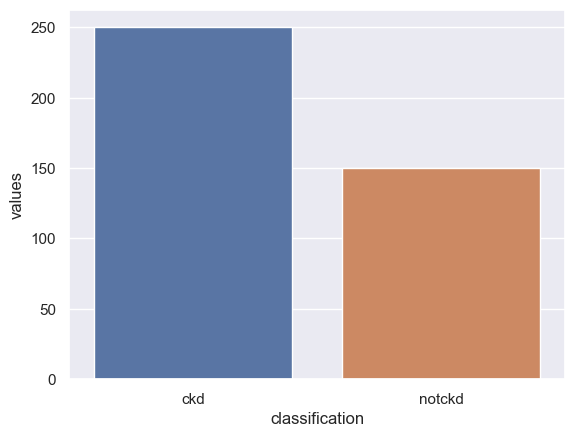

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

temp=data_imputed["classification"].value_counts()
temp_data=pd.DataFrame({'classification':temp.index,'values':temp.values})
print(sns.barplot(x='classification',y="values",data=temp_data))

In [13]:
data.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [14]:
data_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [15]:
data_imputed.dtypes

id                object
age               object
bp                object
sg                object
al                object
su                object
rbc               object
pc                object
pcc               object
ba                object
bgr               object
bu                object
sc                object
sod               object
pot               object
hemo              object
pcv               object
wc                object
rc                object
htn               object
dm                object
cad               object
appet             object
pe                object
ane               object
classification    object
dtype: object

In [16]:
for i in data.select_dtypes(exclude=["object"]).columns:
    data_imputed[i]=data_imputed[i].apply(lambda x:float(x))

In [17]:
data_imputed.dtypes

id                float64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

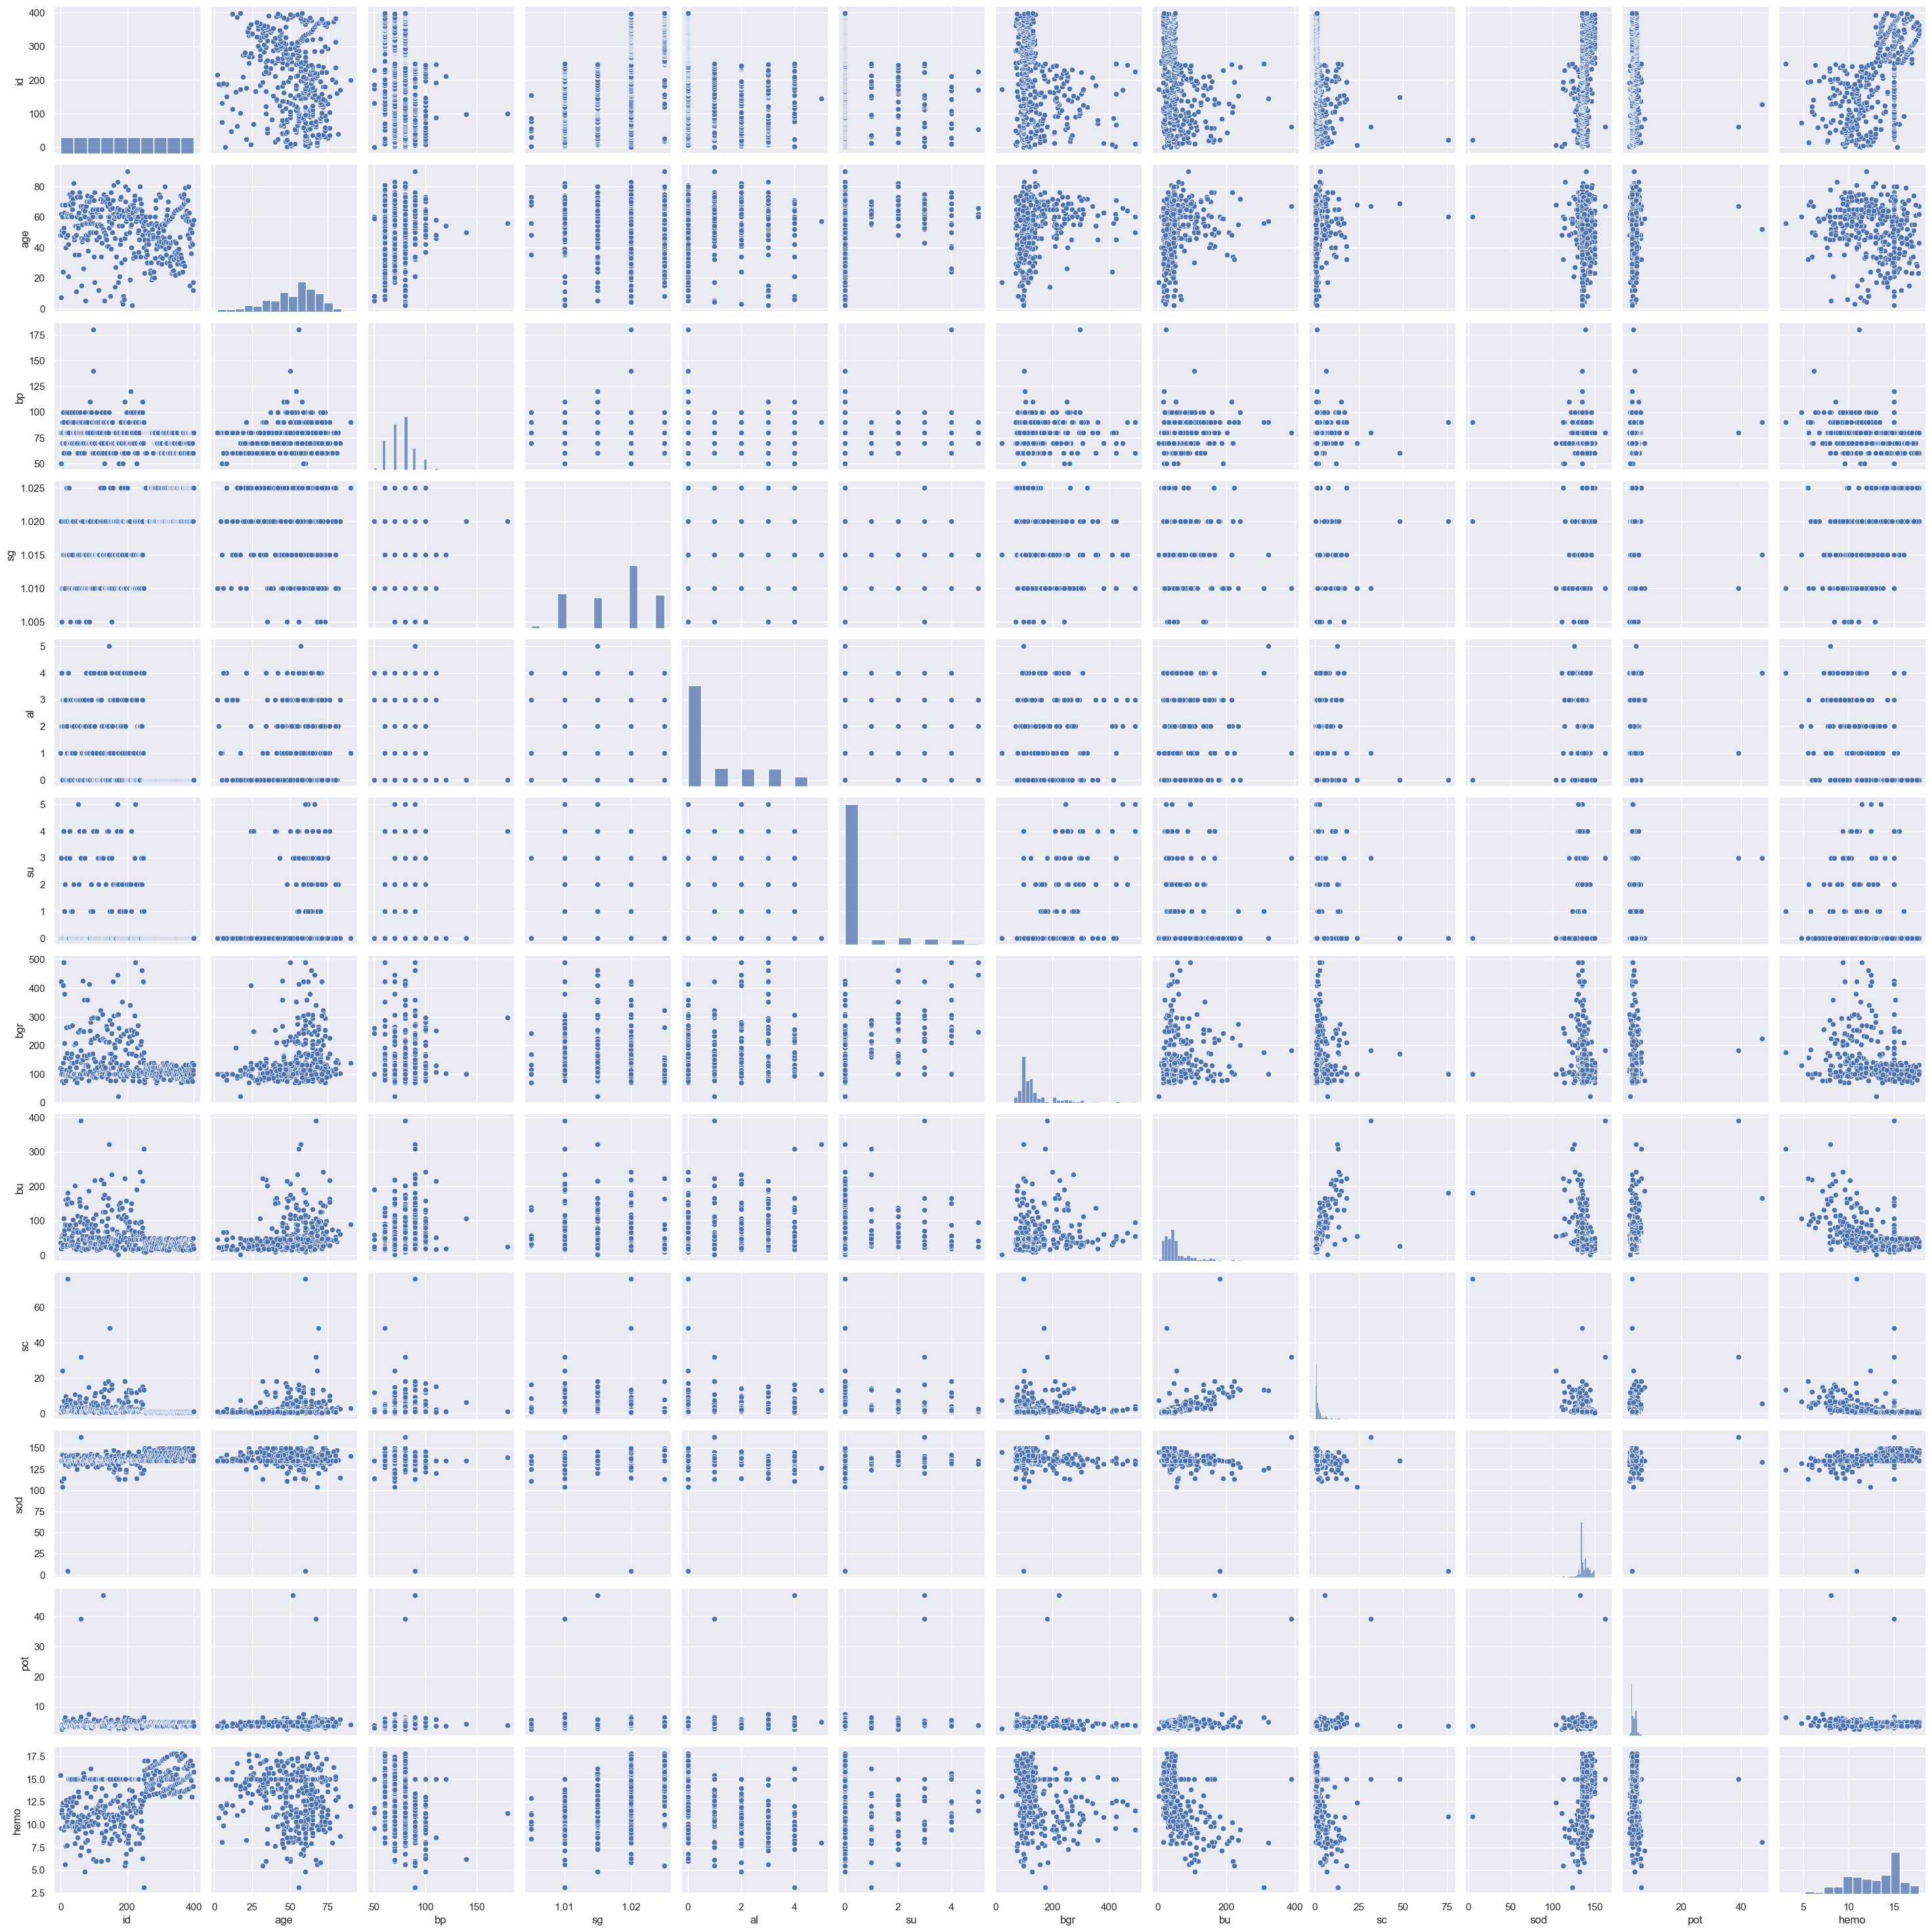

In [18]:
sns.pairplot(data_imputed)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7216\2569059709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


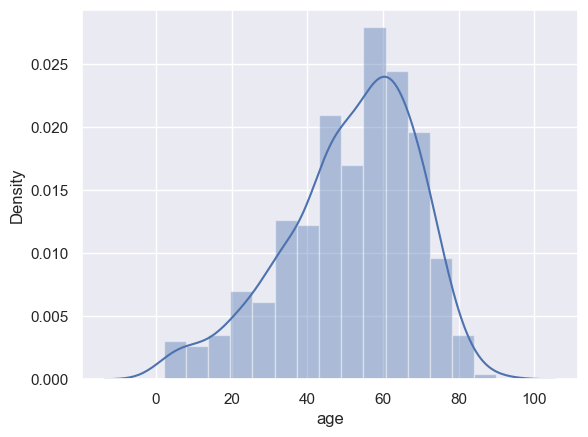

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7216\2569059709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


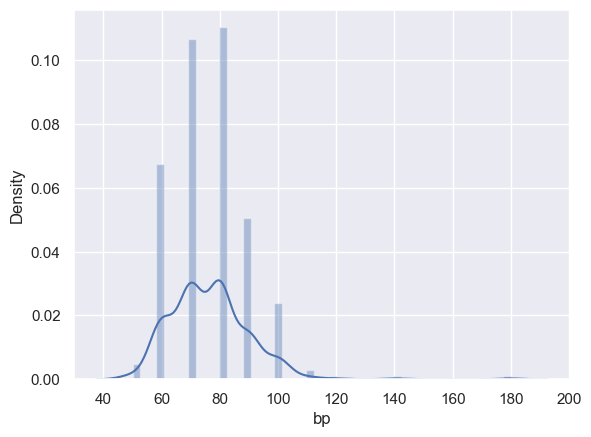

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7216\2569059709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


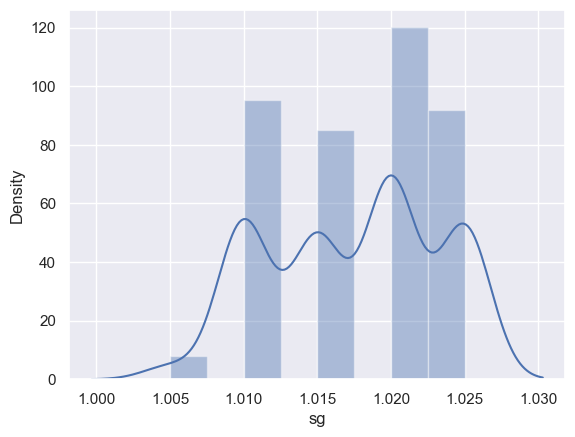

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7216\2569059709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


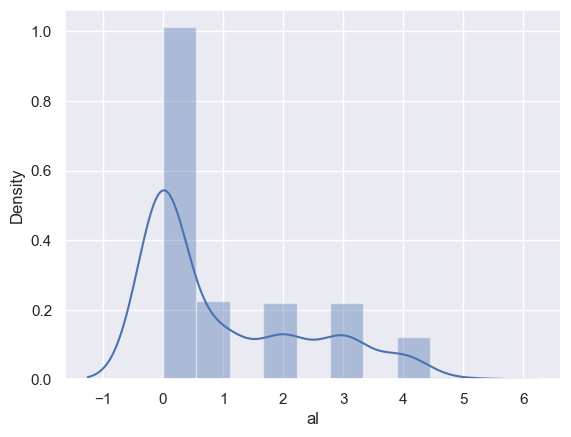

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7216\2569059709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


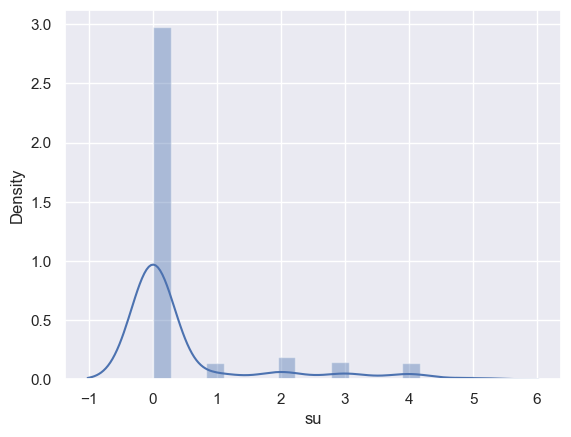

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7216\2569059709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


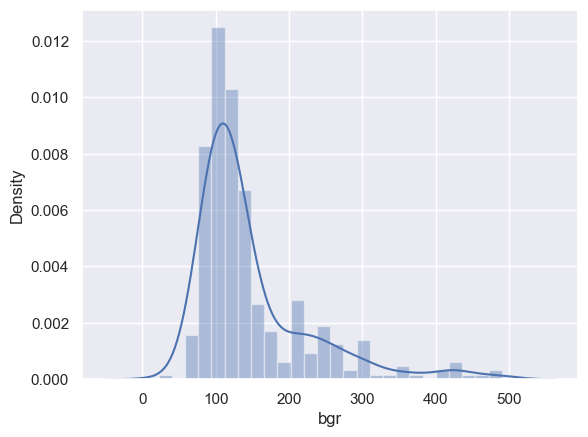

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7216\2569059709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


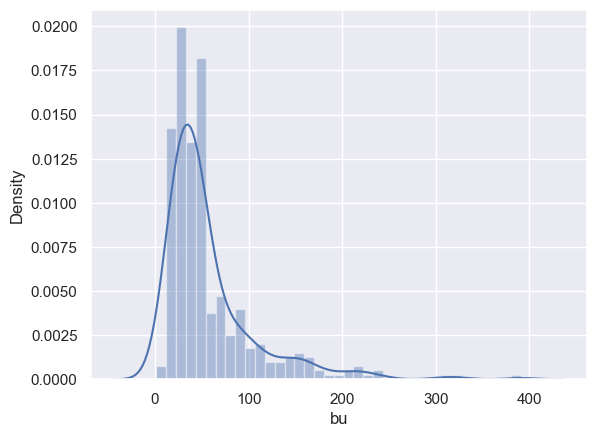

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7216\2569059709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


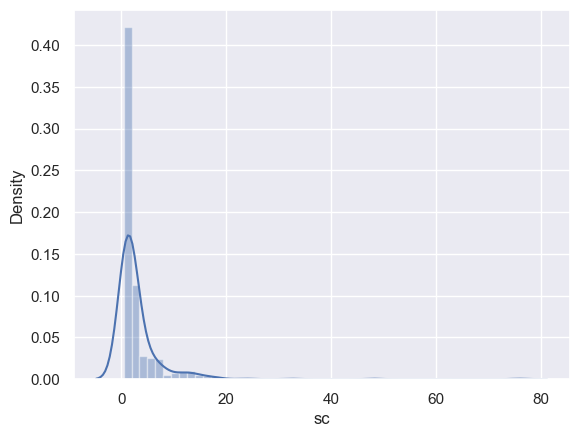

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7216\2569059709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


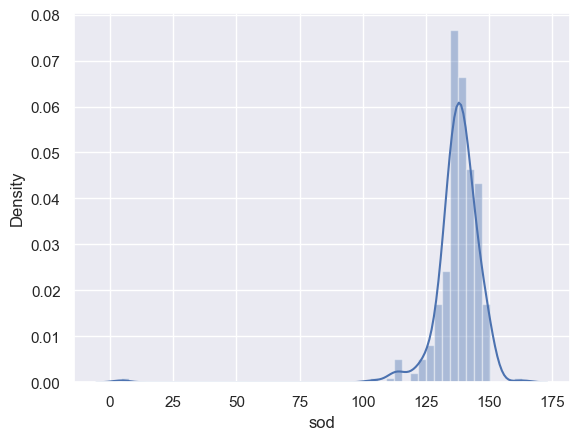

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7216\2569059709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


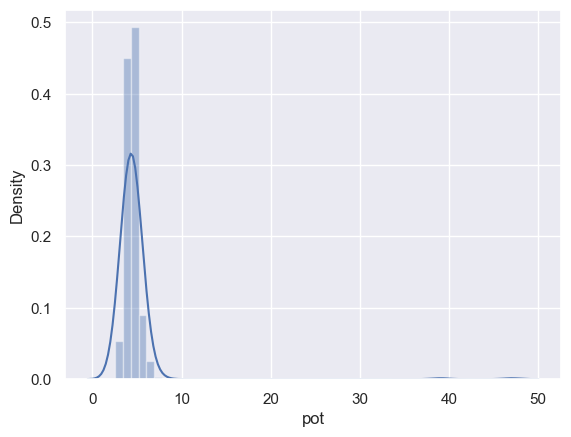

C:\Users\Administrator\AppData\Local\Temp\ipykernel_7216\2569059709.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


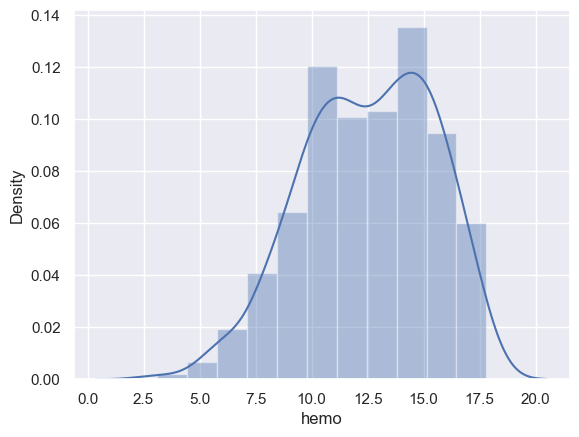

In [19]:
def distplots(col):
    sns.distplot(data[col])
    plt.show()
    
for i in list(data_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    distplots(i)

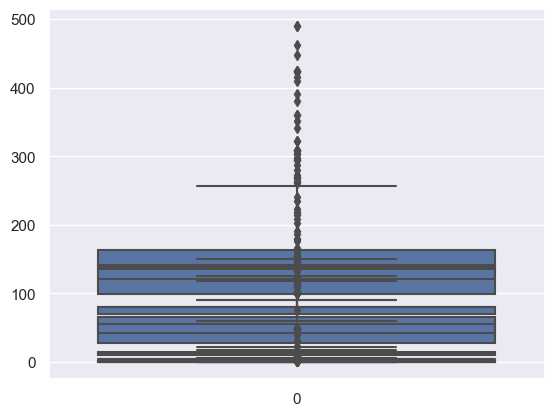

In [20]:
def boxplots(col):
    sns.boxplot(data[col])
    plt.show
    
for i in list(data_imputed.select_dtypes(exclude=["object"]).columns)[1:]:
    boxplots(i)

In [21]:
from sklearn import preprocessing

data_enco=data_imputed.apply(preprocessing.LabelEncoder().fit_transform)
data_enco

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,40,3,3,1,0,1,1,0,0,...,30,69,33,1,2,0,0,0,0,0
1,1,5,0,3,4,0,1,1,0,0,...,24,53,33,0,1,0,0,0,0,0
2,2,54,3,1,2,3,1,1,0,0,...,17,67,33,0,2,0,1,0,1,0
3,3,40,2,0,4,0,1,0,1,0,...,18,59,18,1,1,0,1,1,1,0
4,4,43,3,1,2,0,1,1,0,0,...,21,65,26,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,47,3,3,0,0,1,1,0,0,...,33,59,29,0,1,0,0,0,0,1
396,396,34,2,4,0,0,1,1,0,0,...,40,69,43,0,1,0,0,0,0,1
397,397,8,3,3,0,0,1,1,0,0,...,35,58,35,0,1,0,0,0,0,1
398,398,11,1,4,0,0,1,1,0,0,...,37,64,40,0,1,0,0,0,0,1


In [22]:
data_enco.to_csv("Kidney_Disease_Pre-processed.csv")

<Axes: >

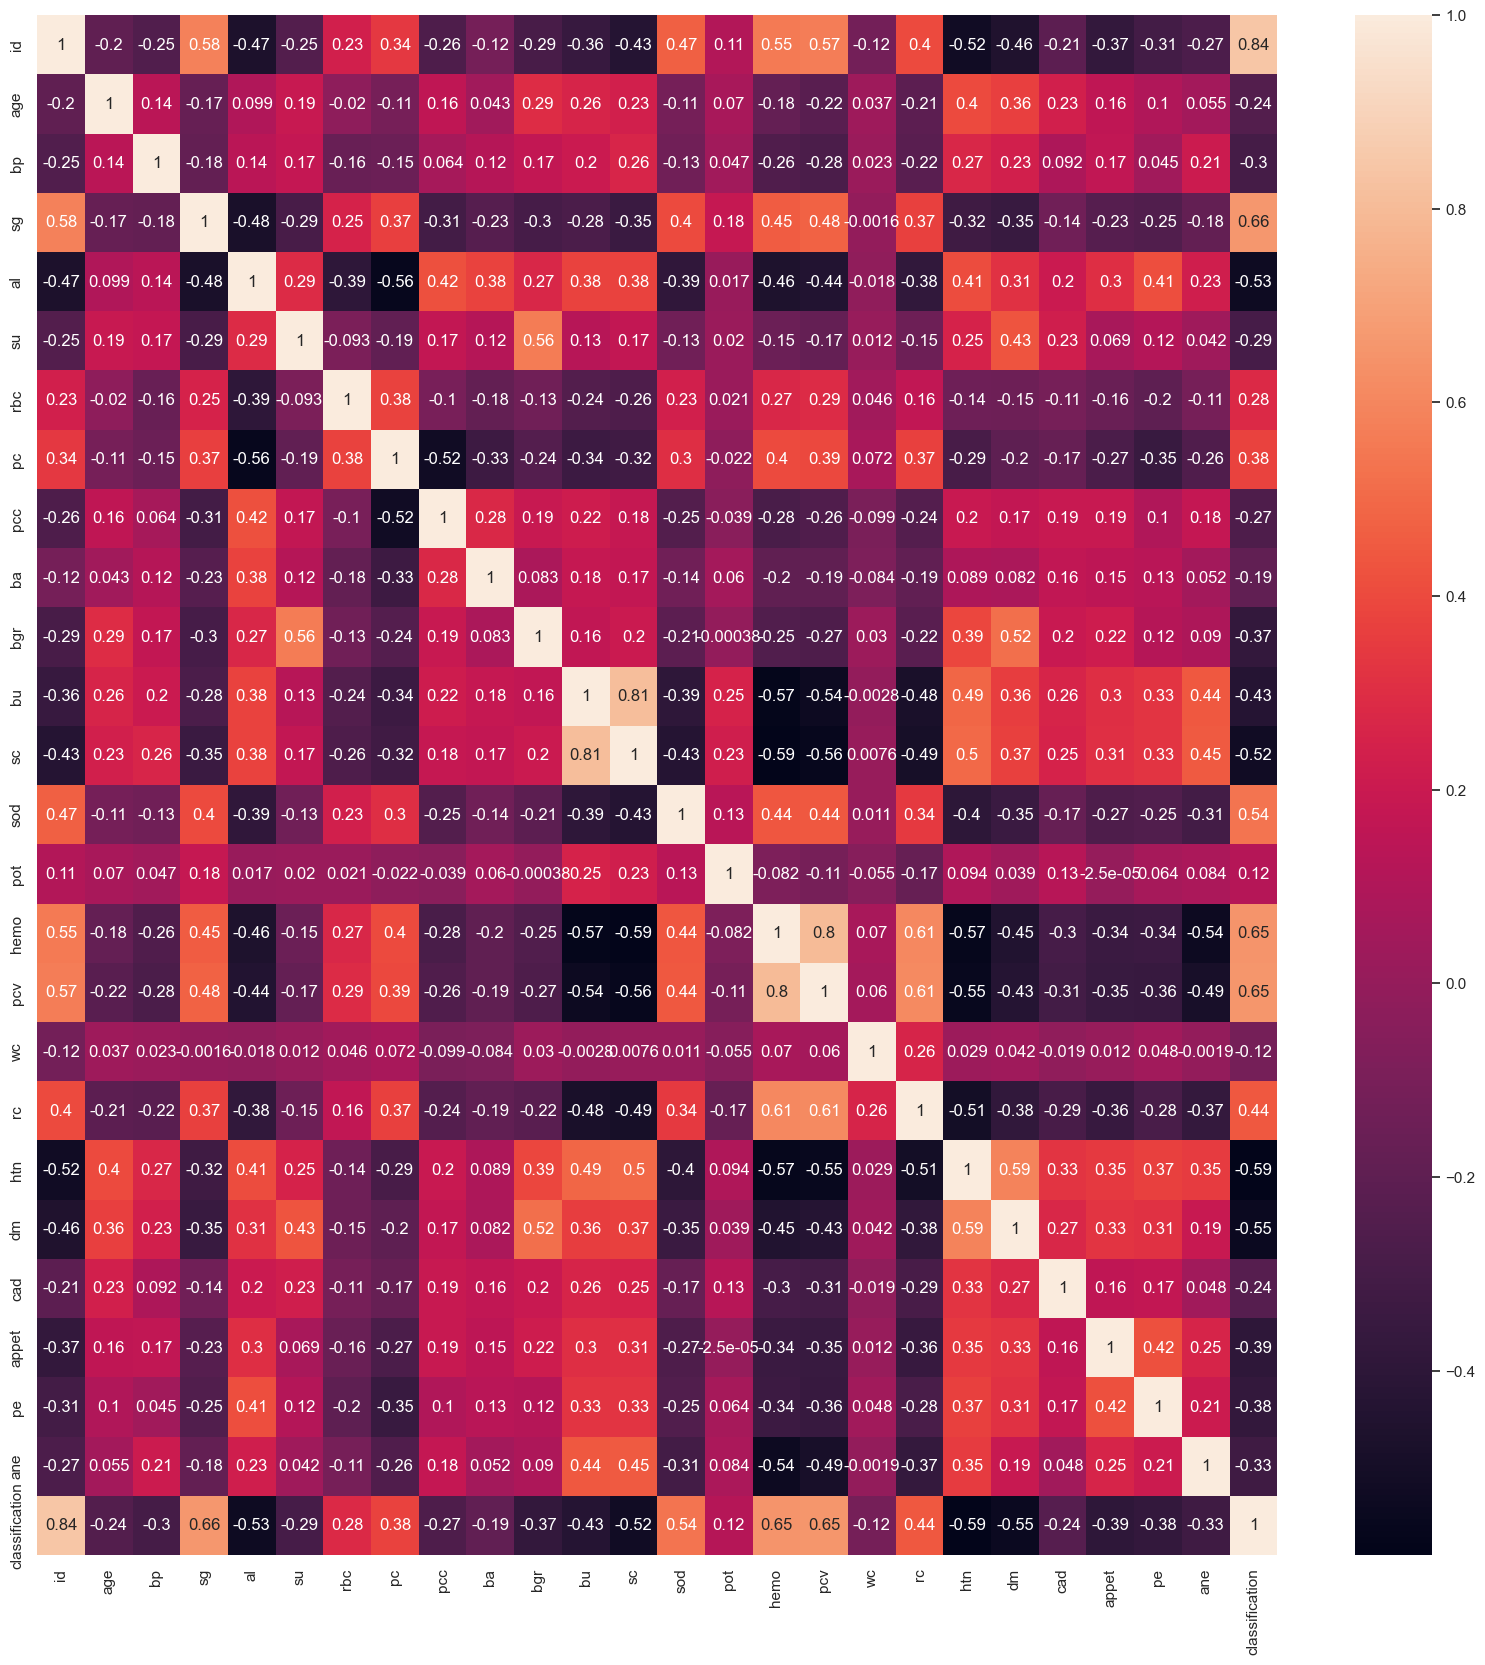

In [23]:
plt.figure(figsize=(20,20))
corr=data_enco.corr()
sns.heatmap(corr,annot=True)

In [24]:
x=data_enco.drop(["id","classification"],axis=1)
y=data_enco["classification"]

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

print(Counter(y))

Counter({0: 250, 1: 150})


In [26]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

ros = RandomOverSampler()

x_ros,y_ros=ros.fit_resample(x,y)
print(Counter(y_ros))

Counter({0: 250, 1: 250})


In [27]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x_ros)
y=y_ros

In [28]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.decomposition import PCA

pca=PCA(.95)
X_PCA=pca.fit_transform(x)

print(x.shape)
print(X_PCA.shape)

(500, 24)
(500, 18)


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_PCA,y,test_size=0.2,random_state=7)

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import Sequential,Model

from keras.optimizers import Adam
from sklearn.model_selection import KFold



In [31]:
def model():
    classifier=Sequential()
    classifier.add(Dense(15,input_shape=(x_train.shape[1],),activation='relu'))
    classifier.add(Dropout(0.2))
    classifier.add(Dense(15,activation='relu'))
    classifier.add(Dropout(0.4))
    classifier.add(Dense(1,activation='sigmoid'))
    classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    
    return classifier

In [32]:
x_train.shape[1]

18

In [33]:
model=model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                285       
                                                                 
 dropout (Dropout)           (None, 15)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                240       
                                                                 
 dropout_1 (Dropout)         (None, 15)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [34]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,verbose=1)

Epoch 1/5
13/13 [==============================] - 11s 121ms/step - loss: 0.7479 - accuracy: 0.5350 - val_loss: 0.7297 - val_accuracy: 0.5700
Epoch 2/5
13/13 [==============================] - 1s 62ms/step - loss: 0.7196 - accuracy: 0.5350 - val_loss: 0.6943 - val_accuracy: 0.6600
Epoch 3/5
13/13 [==============================] - 0s 22ms/step - loss: 0.6898 - accuracy: 0.6400 - val_loss: 0.6609 - val_accuracy: 0.7300
Epoch 4/5
13/13 [==============================] - 0s 21ms/step - loss: 0.6436 - accuracy: 0.7000 - val_loss: 0.6280 - val_accuracy: 0.7600
Epoch 5/5
13/13 [==============================] - 0s 13ms/step - loss: 0.6077 - accuracy: 0.7450 - val_loss: 0.5946 - val_accuracy: 0.7800


In [35]:
import scikitplot as skplt
from sklearn.metrics import roc_curve,auc,confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import precision_recall_curve,precision_recall_curve,average_precision_score,f1_score,confusion_matrix

def plot_auc(t_y,p_y):
    fpr,tpr,thresholds=roc_curve(t_y,p_y,pos_label=1)
    fig,c_ax=plt.subplots(1,1,figsize=(9,9))
    c_ax.plot(fpr,tpr,label='%s(AUC:%0.2f)' % ('classification',auc(fpr,tpr)))
    c_ax.plot([0,1],[0,1],color='navy',lw=1,linestyle='--')
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')
    
def plot_precision_recall_curve_helper(t_y,p_y):
    fig,c_ax=plt.subplots(1,1,figsize=(9,9))
    precision,recall,thresholds=precision_recall_curve(t_y,p_y,pos_label=1)
    aps=average_precision_score(t_y,p_y)
    c_ax.plot(recall,precision,label='%s(AP Score:%0.2f)' %('classification',aps))
    c_ax.plot(recall,precision,color='red',lw=2)
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')
    
def plot_history(history):
    f=plt.figure()
    f.set_figwidth(15)
    
    f.add_subplot(1,2,1)
    plt.plot(history.history['val_loss'],label='val loss')
    plt.plot(history.history['loss'],label='train loss')
    plt.legend()
    plt.title("Model Loss")
    
    
    f.add_subplot(1,2,2)
    plt.plot(history.history['val_accuracy'],label='val accuracy')
    plt.plot(history.history['accuracy'],label='train accuracy')
    plt.legend()
    plt.title("Model Accuracy")
    plt.show()
    

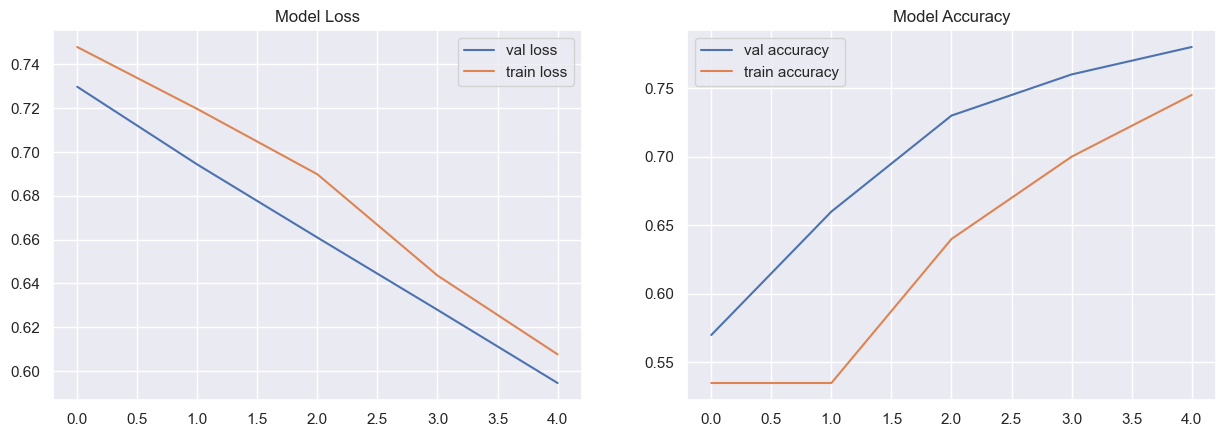

In [36]:
hist=plot_history(history)

4/4 [==============================] - 0s 4ms/step


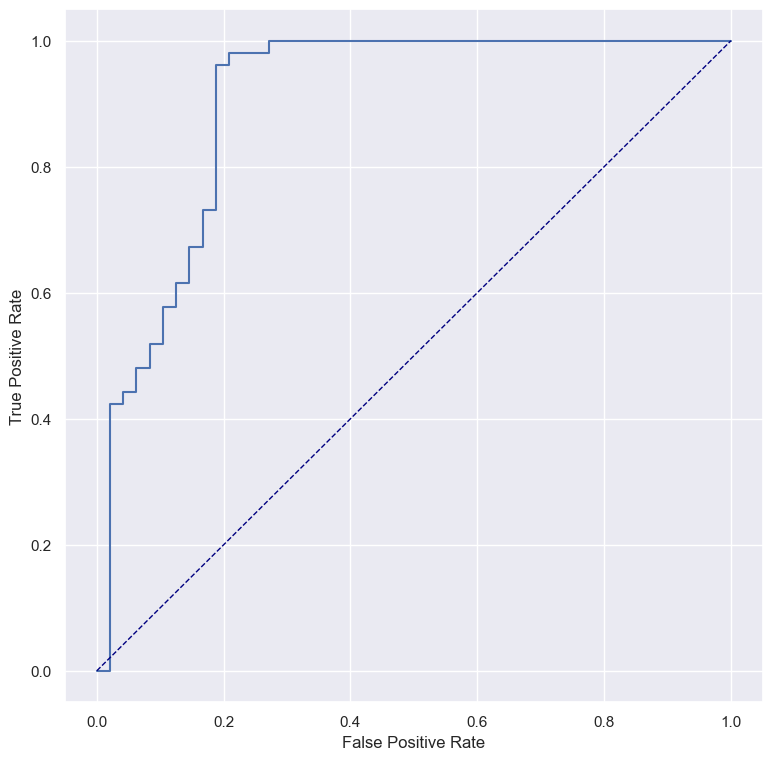

In [37]:
plot_auc(y_test,model.predict(x_test,verbose=True))

4/4 [==============================] - 0s 7ms/step


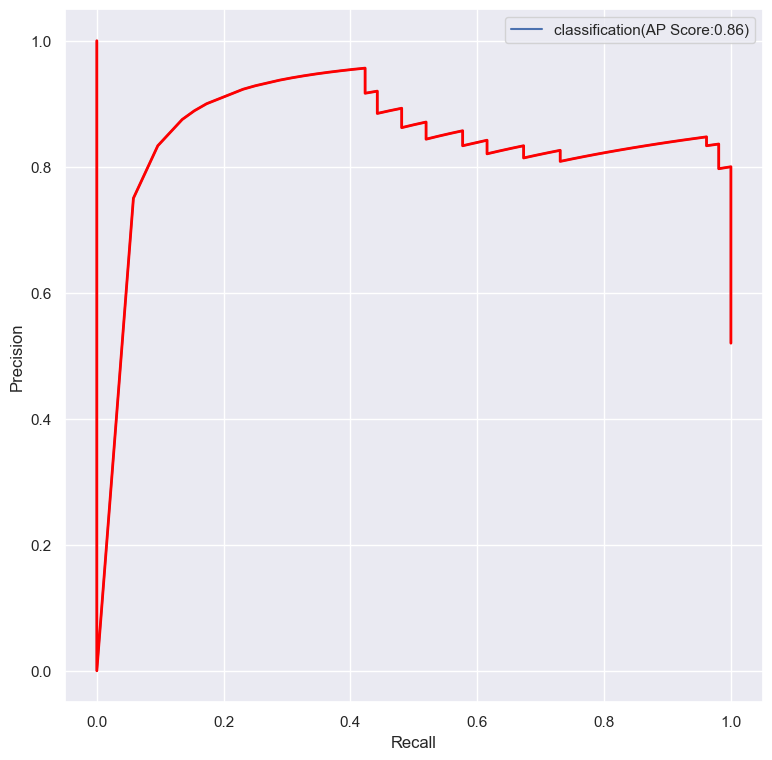

In [38]:
plot_precision_recall_curve_helper(y_test,model.predict(x_test,verbose=True))

In [39]:
def calc_f1(prec,recall):
    return 2*(prec*recall)/(prec+recall) if recall and prec else 0

precision,recall,thresholds=precision_recall_curve(y_test,model.predict(x_test,verbose=True))
f1score=[calc_f1(precision[i],recall[i]) for i in range(len(thresholds))]
idx=np.argmax(f1score)
threshold=thresholds[idx]

print('**********************************************************************************************')
print('Precision:'+ str(precision[idx]))
print('Recall:'+ str(recall[idx]))
print('Thresholds:'+ str(thresholds[idx]))
print('F1 Score:'+ str(f1score[idx]))

4/4 [==============================] - 0s 6ms/step
**********************************************************************************************
Precision:0.8360655737704918
Recall:0.9807692307692307
Thresholds:0.5646494
F1 Score:0.9026548672566372


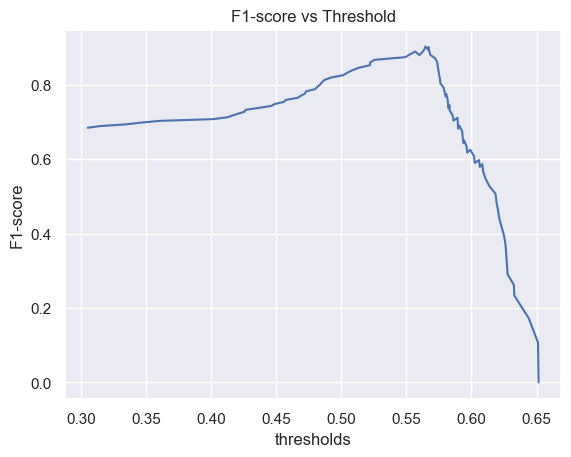

In [40]:
plt.figure()
plt.plot(thresholds,f1score)
plt.title("F1-score vs Threshold")
plt.xlabel("thresholds")
plt.ylabel("F1-score")
plt.show()

In [41]:
lgr=LogisticRegression()
pickle.dump(lgr,open('CKDs.pkl','wb'))